# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('torch', '2.5.1')
    requirements_generator.add_package('pandas', '2.2.3')
    requirements_generator.add_package('matplotlib', '3.9.4')
    requirements_generator.add_package('seaborn', '0.13.2')
    requirements_generator.add_package('numpy', '2.0.2')
    requirements_generator.add_package('scikit-learn', '1.6.1')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.24-py3-none-any.whl (from -r /workdir/root/develop/requirements.txt (line 7))
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 7.4 MB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 8.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 8.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 7.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 8.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 5.7 MB/s 

In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
#import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import torch
import csv
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from os import makedirs, path

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_model_regression_rmse_and_mae')
    manifest_genenerator.set_ait_description(
        '複数の説明変数と1つの目的変数で構築された重回帰分析のモデルのRMSE(Root Mean Square Error)とMAE(Mean Absolute Error)を計算する。RMSEとMAEはともに予測値と実際の値の差を利用して定められているため、値が低いほど品質が良いと言える。'
    )
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_eval_model_regression_rmse_and_mae')
    manifest_genenerator.set_ait_version('0.3')
    keywords = ['regression', 'multiple regression analysis', 'rmse', 'mae']
    for keyword in keywords:
        manifest_genenerator.add_ait_keywords(keyword=keyword)
    manifest_genenerator.add_ait_licenses(license='Apache License Version 2.0')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/C-1機械学習モデルの正確性')
    
    inventory_requirement_trained_model = manifest_genenerator.format_ait_inventory_requirement(format_=['pth'])
    manifest_genenerator.add_ait_inventories(
        name='trained_model', 
        type_='model', 
        description='torch.jit.save関数を使用しTorchScript形式で保存されたモデルデータ。入力層の要素数はdataset_for_verification inventoryのデータと一致させる必要がある。', 
        requirement=inventory_requirement_trained_model
    )
    
    inventory_requirement_dataset_for_verification = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
    manifest_genenerator.add_ait_inventories(
        name='dataset_for_verification', 
        type_='dataset', 
        description='評価に用いるデータセット。1行目に列名、2行目以降に値が記されたcsvファイル形式のデータ',
        requirement=inventory_requirement_dataset_for_verification
    )
    manifest_genenerator.add_ait_parameters(
        name='target_variable', 
        type_='str', 
        description='目的変数の名前。', 
        default_val=''
    )
    manifest_genenerator.add_ait_parameters(
        name='std_scale_columns', 
        type_='str', 
        description='モデルの訓練時に標準化スケーリングしているカラム名。評価に用いるデータセットに対して標準化を行っている場合は、空欄。入力例：カラムA, カラムB', 
        default_val=' '
    )
    manifest_genenerator.add_ait_parameters(
        name='norm_scale_columns', 
        type_='str', 
        description='モデルの訓練時に正規化スケーリングしているカラム名。評価に用いるデータセットに対して正規化を行っている場合は、空欄。入力例：カラムA, カラムB', 
        default_val=' '
    )
    manifest_genenerator.add_ait_measures(
        name='RMSE', 
        type_='float', 
        description='二乗平均平方根誤差。0に近いほど、モデルの精度が高いといえる。MAEと比べて、大きい誤差に影響を受けやすい。',
        structure='single',
        min='0'
    )
    manifest_genenerator.add_ait_measures(
        name='MAE', 
        type_='float', 
        description='平均絶対誤差。0に近いほど、モデルの精度が高いといえる。RMSEと比べて、大きい誤差に影響を受けにくい。',
        structure='single',
        min='0'
    )
    manifest_genenerator.add_ait_resources(
        name='evaluation_index_matrix', 
        type_='table', 
        description='RMSE, MAE, MSEの値が書かれたファイル。'
    )
    manifest_genenerator.add_ait_resources(
        name='observed_predicted_plot', 
        type_='picture', 
        description=(
            '横軸に実際の値、縦軸に予測の値をプロットしたグラフ。'
            '対角線上に多くのデータが存在するほど、予測は正確であることを示している。'
        )
    )
    manifest_genenerator.add_ait_downloads(
        name='Log', 
        description='AITの実行ログ。'
    )
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='trained_model',
                                        value='models/best_model.pth')
    input_generator.add_ait_inventories(name='dataset_for_verification',
                                        value='dataset_house_price/rf_housing.csv')
    input_generator.set_ait_params(name='target_variable',
                                   value='median_house_value')
    input_generator.set_ait_params(name='std_scale_columns',
                                   value='longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value')
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@measures(ait_output, 'RMSE')
def measure_rmse(rmse):
    return float(str(rmse))

In [12]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@measures(ait_output, 'MAE')
def measure_mae(mae):
    return float(str(mae))

In [13]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@resources(ait_output, path_helper, 'evaluation_index_matrix', 'evaluation_index_matrix.csv')
def save_index_matrix(csv_data, file_path: str=None) -> None:
    value_table=pd.DataFrame(csv_data,columns=['Metric','Value'])
    print(value_table)
    value_table.to_csv(file_path,index=False)
    return file_path

In [14]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@resources(ait_output, path_helper, 'observed_predicted_plot', 'correlation_graph_of_predicted_and_measured_values.png')
def save_predicted_plot(Y, predict, file_path: str=None) -> None:

    sns.set_style("whitegrid")
    df_fact = pd.DataFrame({'measured value': Y.flatten(), 
                            'predicted value': predict.flatten()})
    sns_plt = sns.jointplot(x="predicted value", y="measured value", 
                            data=df_fact, kind="reg", 
                            line_kws={'color':'red'}, height=8, 
                            scatter_kws={"s": 4})
    plt.show()
    sns_plt.savefig(file_path)
    return file_path


In [15]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:

    shutil.move(get_log_path(), file_path)

In [16]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper,is_ait_launch)
def main() -> None:

    # model読み込み
    trained_model = ait_input.get_inventory_path('trained_model')
    try:
        model = torch.jit.load(trained_model)
    except Exception as e:
        print(e)
    model.eval()

    # data読み込み
    dataset_for_verification_path = ait_input.get_inventory_path('dataset_for_verification')
    with open(dataset_for_verification_path) as f:
        test_dataset = pd.read_csv(f)

    # 目的変数読み込み
    target_variables = [ait_input.get_method_param_value('target_variable')]

    # 正規化
    std_scale_columns = ait_input.get_method_param_value('std_scale_columns')
    std_scale_list = [ column_name.strip() for column_name in std_scale_columns.strip().split(",")]
    norm_scale_columns = ait_input.get_method_param_value('norm_scale_columns')
    norm_scale_list = [ column_name.strip() for column_name in norm_scale_columns.strip().split(",")]
    std_scaler = StandardScaler()
    norm_scaler = MinMaxScaler()
    if not ('' in std_scale_list):
        test_dataset[std_scale_list] = std_scaler.fit_transform(test_dataset[std_scale_list])
    if not ('' in norm_scale_list):
        test_dataset[norm_scale_list] = norm_scaler.fit_transform(test_dataset[norm_scale_list])
    
    # label抽出
    for t in target_variables:
        test_data_labels = test_dataset.pop(t)
        
    #特徴量とターゲット変数に分けて、データをPyTorchテンソルに変換
    test_data = torch.tensor(test_dataset.values,dtype=torch.float32)
    Y = torch.tensor(test_data_labels.values,dtype=torch.float32).view(-1,1)
    #numpy配列に変換
    Y = Y.numpy()

    # 予測値
    with torch.no_grad():
        predict = model(test_data)
        predict = predict.numpy()

    # RMSEの計算、MAEとMSEの計算
    mae = mean_absolute_error(Y,predict)
    mse = mean_squared_error(Y,predict)
    rmse = np.sqrt(mse)
    csv_data = [['RMSE(Root Mean Square Error)', rmse],
                ['MAE(Mean Absolute Error)',     mae],
                ['MSE(Mean Squared Error)',      mse]] 
    # measure rmse
    measure_rmse(rmse)

    # measure mae
    measure_mae(mae)

    # resource evaluation_index_matrix
    save_index_matrix(csv_data)

    # resource observed_predicted_plot
    save_predicted_plot(Y, predict)
    # downloads Log
    move_log()


                         Metric     Value
0  RMSE(Root Mean Square Error)  0.400871
1      MAE(Mean Absolute Error)  0.270111
2       MSE(Mean Squared Error)  0.160697


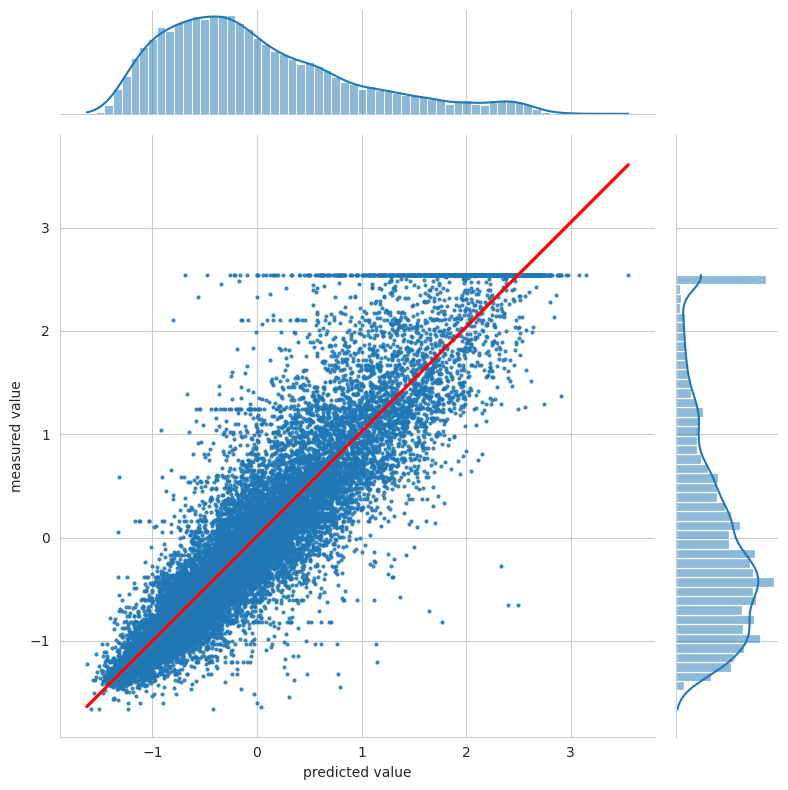

In [17]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [18]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [19]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
